## Exercise 1

1) Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-
movie-reviews/data

2) Take a look at the data and get info about the data

3) Count the number of expressed sentiments by category

4) Provide a histogram of sentiments by category

5) Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers

6) Split dataset (the test dataset represents 30% of the total data).

7) Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.

8) TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.

9) Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.

10. Build the Text Classification Model using TF-IDF.

11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.

12. Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



In [2]:
#1: Loading the dataset
train_df = pd.read_csv("train.tsv", sep="\t")

train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [3]:
#2 info about data
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [4]:
#3: Counting the number of expressed sentiments by category
sentiment_counts = train_df['Sentiment'].value_counts()

sentiment_counts

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

0 - negative,
1 - somewhat negative,
2 - neutral,
3 - somewhat positive,
4 - positive

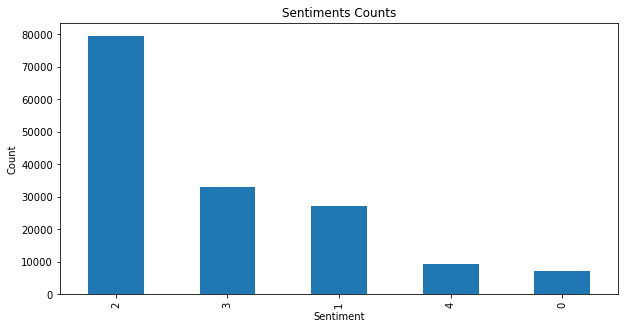

In [5]:
# Step 4: Histogram of sentiments by category
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar')
plt.title('Sentiments Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
#5: Generating document term matrix using CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(train_df['Phrase'])

In [7]:
#6: Spliting dataset into training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, train_df['Sentiment'], test_size=0.3, random_state=42)


In [8]:
#7: Creating and training a Multinomial Naive Bayes classifier and Computing the model accuracy
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 61.12%


In [9]:
#8/9: Spliting dataset for TF-IDF and filtering whole words from Phrase column
X_tfidf = TfidfVectorizer(token_pattern=r'\b\w+\b').fit_transform(train_df['Phrase'])
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, train_df['Sentiment'], test_size=0.3, random_state=42)


In [10]:
#10/11: Building the Text Classification Model using TF-IDF
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB()

In [11]:
#12: Performing prediction on the test set
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f"Accuracy with TF-IDF: {accuracy_tfidf * 100:.2f}%")

Accuracy with TF-IDF: 58.04%


# Exercise 2

### Entities

United Kingdom	Organization	0.67

one	Quantity	0.94

worst	Quantity	0.71

last year	Date	0.99+

Germany	Organization	0.90

pandemic	Event	0.88

global financial crisis	Event	0.77

Europe	Organization	0.86

5%	Quantity	0.99+

last year	Date	0.99+

EU	Organization	0.98

6.4%	Quantity	0.99+

Eurostat	Organization	0.98

United States	Organization	0.87

3.5%	Quantity	0.99+

prior year	Date	0.92

Today	Date	0.98

UK	Organization	0.78

finance minister	Person	0.80

Rishi Sunak	Person	0.99+

United Kingdom	Location	0.99+

January 5	Date	0.99+

first quarter of 2021	Date	0.99+

fourth quarter of 2020	Date	0.99+

double dip	Quantity	0.70

Sam Miley	Person	0.99+

London	Location	0.96

Centre for Economics and Business Research	Organization	0.99+

Friday	Date	0.99+

EU	Organization	0.88

UK	Location	0.35

Brexit	Event	0.98

December 31	Date	0.99+


### Key Phrases

The United Kingdom

the worst recessions

major economies

last year

Germany

the pandemic

the global financial crisis

Provisional estimates

Europe

biggest economy

5%

last year

EU GDP

6.4%

Eurostat

The United States

comparison

GDP

3.5%

the prior year

Today

figures

the economy

a serious shock

a result

the pandemic

countries

the world

UK finance minister Rishi Sunak

a statement

some positive signs

the economy

resilience

the winter

the current lockdown

a significant impact

many people and businesses

The new national lockdown

the United Kingdom

January 5

the economy

the first quarter

2021

the return

growth

the fourth quarter

2020

a double dip [recession]

Sam Miley

an economist

the London-based Centre

Economics and Business Research

a note

Friday

Disruption

EU-UK trade

the end

the Brexit transition period

December 31

activity



# Exercise 3